# In this file we examine the data of $S_{diff}(t)$ as a function of how many initial conditions it's avraged over

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random as rn
import matplotlib.cm as cm
import matplotlib as mpl

In [52]:


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.3
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 15
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["legend.fontsize"] = 15

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()

In [40]:
64 * 4

256

NameError: name 'join' is not defined

In [53]:

N_val = 4

num_unit_cells_vals = [64]
num_init_cond_vals = [20, 200, 2_000, 20_000]

cmap = cm.get_cmap("Greens", len(num_init_cond_vals)*2)

a_val = 0.68
a_val_name = str(a_val).replace(".", "p")

z_vals = [1.6, 1.7, 2.0]
z_val_names = [str(z_val).replace(".", "p") for z_val in z_vals]

z_final = 1.6

data_parent_path = f"../data/spin_dists_per_time/N{N_val}/a{a_val_name}/IC1"
data_parent_path = f"/Volumes/ExternalData/spin_dists_per_time/N{N_val}/a{a_val_name}/IC1"

/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_23603/634755348.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greens", len(num_init_cond_vals)*2)


In [54]:
os.listdir(data_parent_path)

['.DS_Store', 'L32', 'L512', 'L64', 'L128', 'L256']

In [55]:
s_diffs_per_time = {} # L_val: {initcond: [s_diff(t)]}
s_errs_per_time = {}

current_loaded_data = []
for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    print(f"L = {L_val}")
    s_diffs_per_time[L_val] = {}
    s_errs_per_time[L_val] = {}

    final_time = int(L_val ** z_final)
    
    list_of_sample_files = os.listdir(f"{data_parent_path}/L{L_val}")
    for i, sample_file in enumerate(list_of_sample_files):
        valid_sample = False
        for z_val_name in z_val_names:
            if z_val_name in sample_file:
                valid_sample = True
        if not valid_sample:
            continue
        
        sample_num = i+1

        sample_file_path = f"{data_parent_path}/L{L_val}/{sample_file}"
        df = pd.read_csv(sample_file_path)

        current_loaded_data.append(df.loc[:L_val ** 1.6, "delta_s"])

        if sample_num in num_init_cond_vals:
            print(f"L = {L_val} | Reached {sample_num}/{max(num_init_cond_vals)} sample")
            s_diffs_per_time[L_val][sample_num] = np.mean(np.array(current_loaded_data).T, axis=1)
            s_errs_per_time[L_val][sample_num] = np.std(np.array(current_loaded_data).T, axis=1) / np.sqrt(len(current_loaded_data)-1)
            if sample_num == max(num_init_cond_vals):
                print(f"L = {L_val} | Success: Made it to end - {sample_num}/{max(num_init_cond_vals)} sample")

L = 256
L = 256 | Reached 20/20000 sample
L = 256 | Reached 200/20000 sample
L = 256 | Reached 2000/20000 sample
L = 256 | Reached 20000/20000 sample
L = 256 | Success: Made it to end - 20000/20000 sample


In [8]:
np.mean(np.array(current_loaded_data).T, axis=1)

array([1.07477880e+000, 9.97457307e-001, 9.69724673e-001, ...,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,))

In [9]:
sum(np.array(current_loaded_data)) / len(np.array(current_loaded_data))

array([1.07477880e+000, 9.97457307e-001, 9.69724673e-001, ...,
       4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,))

In [10]:
s_diffs_per_time

{256: {10: array([1.07438656e+000, 1.02171480e+000, 1.02724375e+000, ...,
         4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,)),
  100: array([1.07448376e+000, 1.00428771e+000, 9.80051789e-001, ...,
         4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,)),
  1000: array([1.07499538e+000, 9.99630728e-001, 9.72098633e-001, ...,
         4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,)),
  10000: array([1.07483254e+000, 9.97837496e-001, 9.68736161e-001, ...,
         4.94065646e-324, 4.94065646e-324, 4.94065646e-324], shape=(7132,))}}

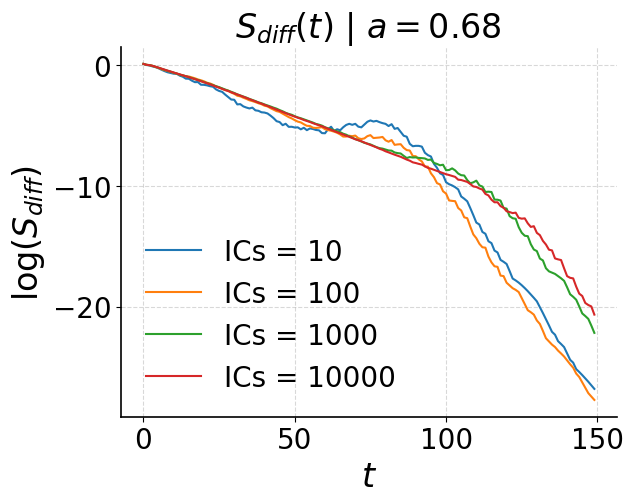

In [81]:
for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    for num_init_conds in num_init_cond_vals:
        y = np.log(np.array(s_diffs_per_time[L_val][num_init_conds]))
        plt.plot(y[:150], label=f"ICs = {num_init_conds}")

    plt.title(fr"$S_{{diff}}(t)$ | $a={a_val}$")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\log(S_{diff})$")
    plt.legend()


plt.savefig(f"../figs/sdiff_vs_IC/s_diff_vs_IC.png")  
plt.show()

Chosen indexes for ICs = 100: [473, 528, 2606, 7797, 4485, 2154, 1250, 4179, 5547, 2766, 1887, 6192, 6661, 8268, 6806, 7373, 6701, 7806, 7233, 2699, 3905, 7588, 2970, 6115, 998, 6275, 2447, 278, 8933, 9447, 9493, 3572, 639, 6357, 2106, 8059, 1379, 1392, 8758, 2241, 2611, 5544, 9283, 3954, 8050, 7083, 3801, 5162, 3003, 1818, 6006, 7953, 3794, 6989, 7304, 4163, 5860, 3986, 3400, 8065, 342, 4130, 9584, 8471, 7344, 9103, 7839, 364, 8347, 4567, 9169, 8969, 1417, 2471, 7484, 9053, 6804, 7225, 8805, 8367, 6984, 3503, 5590, 3422, 9858, 7739, 7668, 7618, 516, 2419, 7746, 5656, 5882, 1160, 8762, 9255, 1600, 5734, 1105, 707]


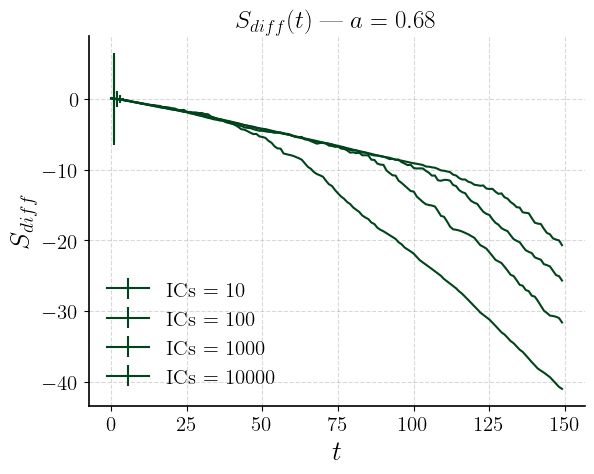

In [33]:
# Finding ideal number of sampples for lowest ICs
sample_nums_to_cherry = [100]
samples_index = [round(rn.uniform(0, max(num_init_cond_vals)-1)) for _ in range(max(sample_nums_to_cherry))]
for sample_num_to_cherry in sample_nums_to_cherry:
    s_diffs_per_time[L_val][sample_num_to_cherry] = np.mean(np.array(current_loaded_data)[samples_index[0:sample_num_to_cherry]].T, axis=1)
    print(f"Chosen indexes for ICs = {sample_num_to_cherry}: {samples_index[0:sample_num_to_cherry]}")

for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    for num_init_conds in num_init_cond_vals:
        y = np.log(np.array(s_diffs_per_time[L_val][num_init_conds]))
        y_errs = np.abs((1 / y) * np.array(s_errs_per_time[L_val][num_init_conds]))
        xs = [i for i in range(0, len(y))]
        x_lim = 150
        plt.errorbar(x=xs[:x_lim], y=y[:x_lim], yerr=y_errs[:x_lim],label=f"ICs = {num_init_conds}",
                 color = cmap((i+5)/(len(num_init_cond_vals)+5)))

    plt.title(fr"$S_{{diff}}(t)$ | $a={a_val}$")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$S_{diff}$")
    plt.legend()


plt.savefig(f"../figs/sdiff_vs_IC/s_diff_vs_IC.png")  
plt.show()


In [83]:
x = np.array([1, 2])
1 / x * (x)

array([1., 1.])

saved_plot: ../figs/sdiff_vs_IC/cherried_s_diff_vs_IC20200200020000.png


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_23603/1939209118.py:17: RuntimeWarning: overflow encountered in divide
  y_errs = np.abs((1 / np.array(s_diffs_per_time[L_val][num_init_conds])) * np.array(s_errs_per_time[L_val][num_init_conds]))
/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_23603/1939209118.py:17: RuntimeWarning: invalid value encountered in multiply
  y_errs = np.abs((1 / np.array(s_diffs_per_time[L_val][num_init_conds])) * np.array(s_errs_per_time[L_val][num_init_conds]))


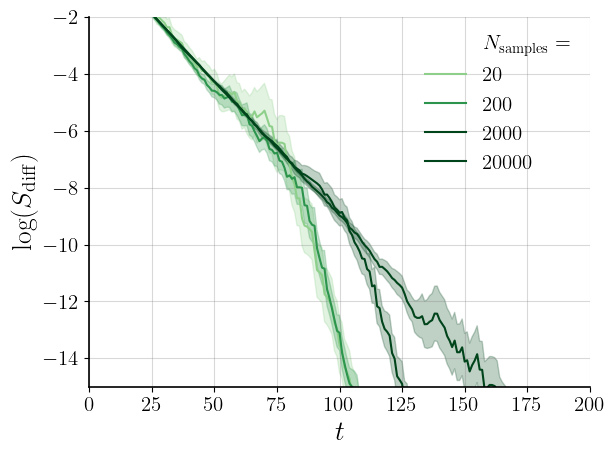

In [58]:
# Using cherried sample vals
# Finding ideal number of sampples for lowest ICs
sample_nums_to_cherry = [10, 100, 20, 200]
samples_index = [4283, 1422, 1521, 8490, 3926, 5985, 1525, 9589, 4861, 7717, 2766, 1887, 6192, 6661, 8268, 6806, 7373, 6701, 7806, 7233, 2699, 3905, 7588, 2970, 6115, 998, 6275, 2447, 278, 8933, 9447, 9493, 3572, 639, 6357, 2106, 8059, 1379, 1392, 8758, 2241, 2611, 5544, 9283, 3954, 8050, 7083, 3801, 5162, 3003, 1818, 6006, 7953, 3794, 6989, 7304, 4163, 5860, 3986, 3400, 8065, 342, 4130, 9584, 8471, 7344, 9103, 7839, 364, 8347, 4567, 9169, 8969, 1417, 2471, 7484, 9053, 6804, 7225, 8805, 8367, 6984, 3503, 5590, 3422, 9858, 7739, 7668, 7618, 516, 2419, 7746, 5656, 5882, 1160, 8762, 9255, 1600, 5734, 1105, 707]
for sample_num_to_cherry in sample_nums_to_cherry:
    s_diffs_per_time[L_val][sample_num_to_cherry] = np.mean(np.array(current_loaded_data)[samples_index[0:sample_num_to_cherry]].T, axis=1)
    s_errs_per_time[L_val][sample_num_to_cherry] = np.std(np.array(current_loaded_data)[samples_index[0:sample_num_to_cherry]].T, axis=1) / np.sqrt(sample_num_to_cherry - 1)

samples_index_1k = [3380, 7814, 9219, 4785, 1470, 5200, 9556, 3622, 586, 9764, 9253, 381, 4250, 49, 534, 7739, 5541, 1964, 9913, 2178, 1762, 4076, 4563, 4963, 9320, 5870, 9173, 6941, 4885, 4353, 1837, 2158, 3995, 7561, 1155, 3091, 1529, 3442, 8243, 9474, 4752, 7006, 6822, 1188, 2729, 6940, 6386, 9057, 7750, 7671, 6066, 605, 2197, 4143, 1476, 2296, 9049, 6713, 1939, 9657, 9321, 4342, 2149, 5301, 8665, 2789, 5440, 7902, 1909, 8556, 7302, 5599, 3384, 7254, 8505, 903, 3436, 6019, 7583, 3361, 6456, 4156, 2155, 9233, 6416, 7351, 4132, 7395, 291, 5538, 9377, 7364, 1151, 9516, 6482, 909, 9991, 6752, 1732, 2825, 6608, 2070, 6933, 4736, 4779, 7396, 3920, 5868, 6055, 3011, 88, 4481, 4561, 2125, 3605, 8379, 8357, 439, 7134, 507, 8511, 4845, 3967, 8270, 4673, 260, 7551, 7866, 5450, 242, 2453, 2425, 7659, 7590, 4265, 9759, 439, 296, 6896, 3908, 3216, 5422, 3598, 6026, 5636, 8380, 8819, 1233, 2661, 3396, 6223, 4929, 8690, 3719, 7471, 4945, 3179, 131, 7633, 9843, 911, 9595, 8116, 3878, 1278, 1161, 3662, 9594, 3120, 6058, 6065, 3793, 5197, 9657, 373, 528, 8997, 5227, 9417, 8162, 4659, 7795, 8664, 8719, 7738, 2522, 7491, 773, 223, 1366, 1840, 2696, 8583, 3259, 9237, 6355, 8572, 5143, 1017, 94, 7328, 8985, 6807, 6272, 7866, 2526, 106, 8477, 4035, 638, 1174, 3401, 2709, 5840, 8412, 6961, 9519, 7726, 5758, 9699, 3192, 762, 3602, 8133, 4625, 1481, 3066, 6826, 50, 8687, 7621, 6869, 6065, 4465, 6928, 8066, 843, 8729, 3090, 7922, 1306, 7108, 4360, 4638, 7928, 4519, 8817, 4174, 976, 8527, 2007, 6298, 6401, 2549, 244, 5037, 604, 7381, 7563, 5352, 9534, 9474, 64, 9182, 2786, 389, 5505, 2380, 7220, 1000, 942, 9830, 5766, 9844, 2166, 1896, 2349, 3427, 1668, 4135, 2469, 4129, 398, 7222, 4983, 8133, 1957, 63, 3390, 8264, 2153, 9416, 1458, 9503, 6113, 7024, 6418, 918, 6432, 6140, 3522, 1309, 7281, 3484, 598, 6215, 1823, 8990, 3006, 3887, 9492, 7326, 3676, 4650, 3658, 9980, 1339, 8402, 8938, 9797, 3084, 7406, 5929, 1162, 5718, 6984, 2375, 4125, 9077, 2256, 787, 930, 7245, 4081, 8708, 8588, 6451, 468, 32, 4412, 4299, 6084, 2975, 2060, 1141, 2109, 3598, 7275, 4212, 5323, 1727, 6088, 9156, 8884, 3765, 6233, 4738, 9495, 9382, 7123, 8270, 9789, 439, 2684, 1062, 1327, 7572, 7435, 903, 704, 903, 3405, 7450, 7726, 3273, 6269, 403, 9083, 8822, 4713, 9639, 9943, 7895, 2435, 3432, 9315, 143, 3266, 5178, 3308, 4646, 2619, 8799, 7532, 7358, 7201, 8460, 1418, 1313, 1465, 9548, 7296, 6779, 6378, 5141, 5932, 9213, 420, 9837, 8613, 6634, 562, 3974, 2238, 144, 6086, 7308, 4107, 5536, 7619, 23, 4497, 3131, 9979, 2706, 2349, 4963, 1045, 9133, 1869, 847, 3246, 2319, 7320, 1506, 2075, 9286, 4299, 9671, 5990, 5516, 4881, 2269, 4553, 476, 4702, 6450, 9529, 3882, 3999, 8402, 5268, 4019, 1600, 9430, 4063, 818, 7432, 809, 1976, 7770, 1948, 3497, 4847, 6950, 619, 6353, 755, 5779, 5824, 9762, 5346, 3446, 5116, 2106, 7967, 346, 3355, 1697, 4038, 2264, 1952, 9221, 5422, 6307, 91, 4877, 9295, 1702, 7822, 7040, 6836, 7963, 5218, 9237, 6934, 3254, 5395, 5783, 2735, 7209, 6991, 5738, 1978, 3352, 7747, 7621, 2521, 9030, 6758, 1376, 1346, 7621, 2576, 8929, 3023, 1424, 322, 731, 643, 3583, 4115, 8302, 9481, 6290, 9901, 5352, 4399, 7092, 8311, 9484, 5548, 1255, 1159, 2035, 7282, 667, 4611, 6598, 2591, 8255, 6049, 4969, 5653, 1807, 1154, 441, 4056, 2421, 8893, 2877, 1773, 8699, 152, 3460, 278, 416, 6821, 434, 5079, 6710, 7249, 4356, 1207, 7282, 2186, 4603, 7348, 1901, 775, 1220, 5995, 257, 5603, 4703, 6845, 6575, 4522, 4358, 8960, 3661, 4096, 3660, 7382, 2884, 2595, 9819, 7170, 9276, 7988, 8536, 8134, 9166, 7199, 6007, 2902, 2267, 5179, 5944, 5287, 7408, 7301, 4986, 2439, 8446, 4925, 13, 8468, 7930, 4763, 8199, 9168, 6860, 423, 1412, 5911, 73, 8778, 8385, 7790, 7289, 5091, 5482, 5797, 685, 6019, 8706, 2968, 8112, 3545, 681, 7209, 3276, 8205, 7262, 3299, 7970, 7400, 1196, 5776, 4640, 5567, 9489, 4371, 1804, 3103, 4523, 5625, 9788, 2724, 6676, 577, 6417, 8003, 7933, 317, 4390, 2643, 2258, 684, 717, 2180, 8480, 8094, 265, 9655, 8724, 5669, 7742, 6735, 5206, 6114, 3932, 5132, 97, 9107, 5654, 1968, 2725, 5858, 3639, 1783, 8277, 6109, 3666, 2221, 9840, 1403, 8436, 4771, 6585, 6788, 4311, 5310, 9692, 7920, 1058, 6209, 5940, 6755, 4982, 3646, 7690, 2610, 6667, 2491, 9520, 5610, 2008, 5653, 2678, 543, 4084, 432, 8588, 7326, 6761, 2640, 1724, 7407, 4789, 8877, 5020, 3488, 7449, 4300, 7712, 8017, 9066, 6148, 3794, 2113, 490, 8053, 5101, 4976, 7651, 4147, 3349, 7113, 8918, 2859, 7968, 5784, 5129, 6200, 2248, 3382, 1229, 8045, 7602, 2992, 9429, 5073, 8138, 381, 7890, 8169, 1101, 4911, 8342, 3257, 7547, 140, 3213, 9835, 2118, 567, 3181, 376, 5693, 5602, 120, 803, 4950, 1249, 5282, 1209, 1819, 7250, 1072, 5909, 1234, 7106, 9813, 8960, 1831, 5759, 8583, 9975, 2018, 2061, 9393, 3764, 6939, 6441, 2269, 1840, 4035, 6737, 8154, 8301, 8488, 3058, 235, 1460, 3834, 7080, 4692, 5168, 4450, 4271, 8596, 6800, 4756, 6839, 6889, 1209, 9160, 2472, 2962, 4995, 6313, 8427, 6013, 7026, 4281, 6483, 5935, 2432, 5000, 5662, 3760, 2713, 3032, 461, 2736, 8868, 7486, 6820, 2173, 1494, 4353, 5093, 4394, 8398, 2951, 3803, 5156, 7160, 4137, 9865, 6565, 9698, 465, 7285, 2981, 2801, 4124, 2823, 4686, 2403, 9204, 2390, 4874, 9798, 5025, 4777, 50, 4768, 3064, 5334, 6947, 2979, 2422, 1948, 9854, 5193, 7576, 4856, 7895, 690, 9741, 7704, 7315, 4909, 563, 3206, 3338, 9183, 688, 9322, 7797, 5738, 9805, 8041, 7307, 1173, 8193, 9883, 6169, 193, 1214, 3517, 7688, 5860, 7798, 6929, 8516, 7412, 2639, 6834, 9027, 7434, 8346, 1431, 8665, 7627, 4706, 9247, 9839, 6954, 6231, 4204, 2621, 7402, 8940, 5058, 6692, 3452, 6829, 9137, 6997, 335, 4857, 3490, 8650, 9021, 7981, 9125, 9957, 9114, 4181, 1580, 9115, 8387, 8730, 7554, 9303, 508, 3470, 3522, 4371, 1652, 2182, 5754, 5817, 7366, 125, 1886, 319, 7782, 1742, 2791, 5116, 190, 4999, 1936, 2882, 8314, 9279, 2511, 8917, 6635, 7338, 6936, 2782, 1947, 9934, 4383, 673, 9168, 7641, 660, 2553, 2972, 6269, 4844, 2787, 2610, 9828, 7500, 1134, 2364, 6423, 2025, 5489, 6606, 1427, 4932]
s_diffs_per_time[L_val][1000] = np.mean(np.array(current_loaded_data)[samples_index_1k[0:1000]].T, axis=1)
s_errs_per_time[L_val][1000] = np.std(np.array(current_loaded_data)[samples_index_1k[0:1000]].T, axis=1) / np.sqrt(1000 - 1)
plt.plot([], [], color=(0, 0, 0, 0), label=r"$N_{\mathrm{samples}} = $")
for num_unit_cells in num_unit_cells_vals:
    L_val = num_unit_cells * N_val
    for i, num_init_conds in enumerate(num_init_cond_vals):
        y = np.log(np.array(s_diffs_per_time[L_val][num_init_conds]))
        y_errs = np.abs((1 / np.array(s_diffs_per_time[L_val][num_init_conds])) * np.array(s_errs_per_time[L_val][num_init_conds]))
        xs = np.arange(len(y))
        x_lim = 200

        c = cmap(i*2 + 3)

        plt.plot(xs[:x_lim], y[:x_lim], color=c, label=rf"${num_init_conds}$")
        plt.fill_between(xs[:x_lim],
                         y[:x_lim] - y_errs[:x_lim],
                         y[:x_lim] + y_errs[:x_lim],
                         color=c,
                         alpha=0.25) 

    # plt.title(fr"$\mathrm{{ln}}(S_{{diff}}(t))$ | $a={a_val}$")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$\log(S_{\mathrm{diff}})$")
    plt.legend()

plt.ylim(-15, -2)
plt.xlim(0, 200)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

filename = f"../figs/sdiff_vs_IC/cherried_s_diff_vs_IC{"".join([str(n) for n in num_init_cond_vals])}.png"
plt.savefig(filename)
print("saved_plot:", filename)
plt.show()

'10100100010000'